In [1]:
import numpy as np
from layer import Layer
from util import mean_sqared_error, relu_derivation
import matplotlib.pyplot as plt

from multi_layer_perceptron import MultiLayerPerceptron

# Test Single Perceptron

In [5]:
input_units = 3
n_units = 2

layer_input = np.matrix([1,2,3])

test_layer = Layer(input_units= input_units, n_units = n_units)

In [6]:
test_input = np.matrix([1,2])
test_input.shape

(1, 2)

In [7]:
test_layer.set_input(test_input)

test_layer.set_input(layer_input)

test_layer.layer_input

Layer: Shape of input has to be (1,3), but a matrix with shape (1, 2) is given!


matrix([[1, 2, 3, 1]])

In [8]:
test_layer.forward_step()

matrix([[2.04031651, 3.21704092]])

In [9]:
test_target =  test_layer.layer_activation - np.matrix([0.1,0.2])
test_target

matrix([[1.94031651, 3.01704092]])

In [10]:
test_m_sqr_e = mean_sqared_error(test_layer.layer_activation, test_target)
test_m_sqr_e

matrix([[0.005, 0.02 ]])

In [11]:
test_layer.backward_step(test_m_sqr_e)

[[0.01051645 0.01577636 0.01082441 0.        ]]


In [12]:
test_layer.forward_step()

matrix([[2.03656651, 3.20204092]])

In [13]:
epochs = 10
x_error = []
y_error = []

for epoch in range(epochs):
    test_layer.forward_step()
    test_layer.backward_step(test_m_sqr_e)
    msqe = mean_sqared_error(test_layer.layer_activation, test_target)
    print("Error: ", msqe)
    x_error.append(msqe.item(0))
    y_error.append(msqe.item(1))

[[ 1.04952008e-02  1.57338551e-02  1.07606633e-02 -2.12500000e-05]]
Error:  [[0.00463203 0.0171125 ]]
[[ 1.04739508e-02  1.56913551e-02  1.06969133e-02 -4.25000000e-05]]
Error:  [[0.00427812 0.01445   ]]
[[ 1.04527008e-02  1.56488551e-02  1.06331633e-02 -6.37500000e-05]]
Error:  [[0.00393828 0.0120125 ]]
[[ 1.04314508e-02  1.56063551e-02  1.05694133e-02 -8.50000000e-05]]
Error:  [[0.0036125 0.0098   ]]
[[ 0.0104102   0.01556386  0.01050566 -0.00010625]]
Error:  [[0.00330078 0.0078125 ]]
[[ 0.01038895  0.01552136  0.01044191 -0.0001275 ]]
Error:  [[0.00300312 0.00605   ]]
[[ 0.0103677   0.01547886  0.01037816 -0.00014875]]
Error:  [[0.00271953 0.0045125 ]]
[[ 0.01034645  0.01543636  0.01031441 -0.00017   ]]
Error:  [[0.00245 0.0032 ]]
[[ 0.0103252   0.01539386  0.01025066 -0.00019125]]
Error:  [[0.00219453 0.0021125 ]]
[[ 0.01030395  0.01535136  0.01018691 -0.0002125 ]]
Error:  [[0.00195312 0.00125   ]]


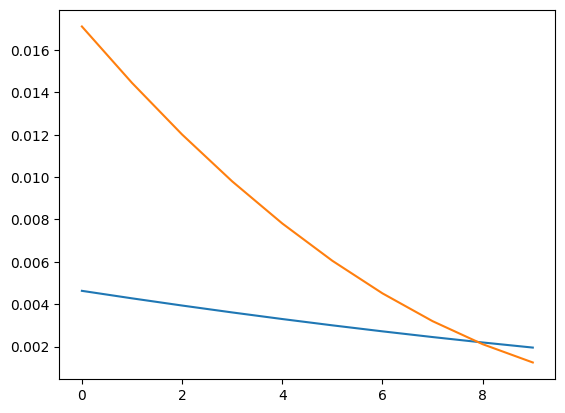

In [14]:
plt.plot(x_error)
plt.plot(y_error)


# Test early MLP

In [1]:
import numpy as np
from layer import Layer
from util import mean_sqared_error, relu_derivation
import matplotlib.pyplot as plt

from multi_layer_perceptron import MultiLayerPerceptron

In [2]:
inputs = np.load("input_data.npy")
targets = np.load("target_data.npy")

In [3]:
mlp = MultiLayerPerceptron(1,[10,1])

In [8]:
epochs =  1000
cur_error = []
error = []

for epoch in range(epochs):

    for x, t in zip(inputs, targets):
        mlp.set_input(np.matrix([x]))
        mlp.forward_step()
        mlp.backpropagation(np.matrix([t]))
        msqe = mean_sqared_error(mlp.prediction, np.matrix([t]))
        cur_error.append(msqe.item(0))
    
    sum_error = 0
    for x in cur_error:
        sum_error += x

    sum_error /= len(cur_error)
    error.append(sum_error)

In [7]:
error

[0.010639407730375373,
 0.01090331661414634,
 0.0075298072310803505,
 0.0014439471172436509,
 0.0009118527620809389,
 1.6740003339935007e-05,
 0.0031253364415835634,
 0.0005678130310546827,
 0.0008438350485792821,
 0.0027959845148422644,
 0.010062409622699569,
 4.0700224525699045e-05,
 0.010962115134942944,
 0.005078414800760958,
 0.002620982815587541,
 0.010614968569878898,
 0.005973119819243976,
 0.006861814665714983,
 0.010805306642021591,
 0.0019079739361189051,
 0.005857605234973485,
 0.010972986134158477,
 0.003932839724448921,
 4.750638421248752e-05,
 0.002539886431385483,
 0.008697457361867693,
 0.010637938650921984,
 0.010953141654468217,
 0.00014885414226656875,
 0.010804989043496936,
 0.0009441383747767947,
 0.0011867126605694367,
 0.00449134769605644,
 0.0013917074355152157,
 0.007594709802322388,
 0.0010808977345978087,
 0.00883500797618603,
 0.0018501664122003876,
 0.0007257282545214248,
 0.001123827256287292,
 0.006529105142079951,
 0.003816947416992287,
 0.0109518145048

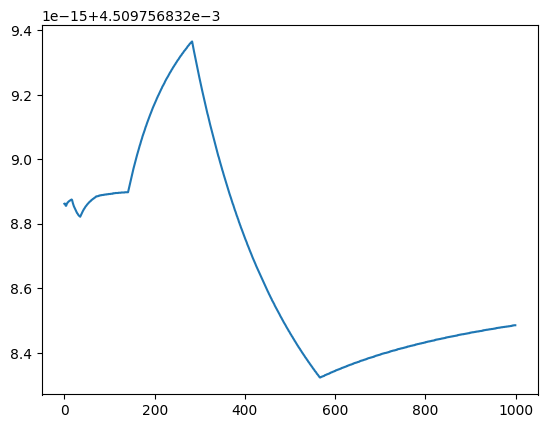

In [10]:
plt.plot(range(epochs),error)


# Try mlp

In [ ]:
mlp = MultiLayerPerceptron(2, [1,2,1])

In [ ]:
input_l = np.matrix([1,0])
mlp.set_input(input_l)
mlp.mlp_input

matrix([[1, 0]])

In [ ]:
target = mlp.forward_step() + 0.2

In [ ]:
target

matrix([[0.41672305]])

In [ ]:
mlp.backpropagation(target)

pre_activation_derivation:  [[1]]
activation_derivation:  [[0.02]]
input_gradient:  [[0.00153033 0.00859211]]
pre_activation_derivation:  [[1 1]]
activation_derivation:  [[0.00153033 0.00859211]]
input_gradient:  [[0.00647006]]
pre_activation_derivation:  [[1]]
activation_derivation:  [[0.00647006]]
input_gradient:  [[0.00433446 0.00066382]]


pre_activation_derivation:  [[1]]
activation_derivation:  [[0.08682905]]
input_gradient:  [[-0.0106679   0.02635006]]
pre_activation_derivation:  [[1 1]]
activation_derivation:  [[-0.0106679   0.02635006]]
input_gradient:  [[0.00831595]]
pre_activation_derivation:  [[1]]
activation_derivation:  [[0.00831595]]
input_gradient:  [[0.00438608 0.00085321]]
Error:  [[0.08682905]]
pre_activation_derivation:  [[1]]
activation_derivation:  [[0.08682905]]
input_gradient:  [[-0.01075271  0.02635006]]
pre_activation_derivation:  [[1 1]]
activation_derivation:  [[-0.01075271  0.02635006]]
input_gradient:  [[0.00825598]]
pre_activation_derivation:  [[1]]
activation_derivation:  [[0.00825598]]
input_gradient:  [[0.00435102 0.00084705]]
Error:  [[0.08682905]]
pre_activation_derivation:  [[1]]
activation_derivation:  [[0.08682905]]
input_gradient:  [[-0.01083758  0.02635006]]
pre_activation_derivation:  [[1 1]]
activation_derivation:  [[-0.01083758  0.02635006]]
input_gradient:  [[0.00819596]]
pre_acti

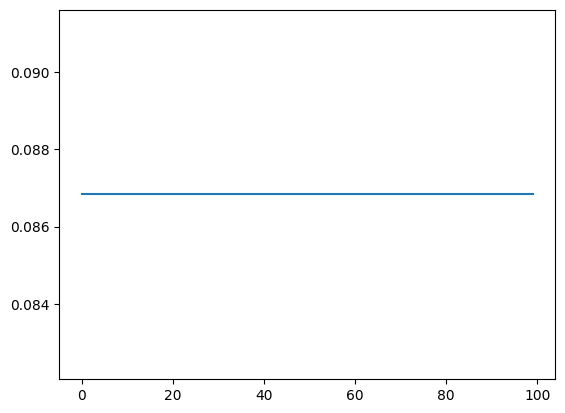

In [ ]:
plt.plot(error)

In [ ]:
a = np.matrix([1,0])
b = np.matrix([1])

c = np.append(a,b,axis=1)
c

matrix([[1, 0, 1]])

In [ ]:
np.delete(c,-1, axis=1)

matrix([[1, 0]])

In [ ]:
print(relu_derivation(np.matrix([[0,1],[2,3]])))

[[0 1]
 [1 1]]
